In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Use Pandas to read data
dummy = "dummy.csv"
dummy_df = pd.read_csv(dummy)
dummy_df.head()

,Unnamed: 0,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,3,55,0,175,94,100,202,380,179,143,28,71,1,0,1
4,4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [11]:
# Using GroupBy in order to separate the data into fields according to "sex" values
grouped_sex_df = dummy_df.groupby(['sex'])

# In order to be visualized, a data function must be used...
grouped_sex_df.count().head(10)

,Unnamed: 0,age,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
sex,,,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203,203,203
1,249,249,249,249,249,249,249,249,249,249,249,249,249,249


In [12]:
grouped_sex_df["True"].sum()

sex
0     85
1    160
Name: True, dtype: int64

In [13]:
sex_presence = grouped_sex_df["True"].sum()
sex_presence.head()

sex
0     85
1    160
Name: True, dtype: int64

In [15]:
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})
sex_summary_df.head()

,Number of Arrhythmias
sex,
0,85
1,160


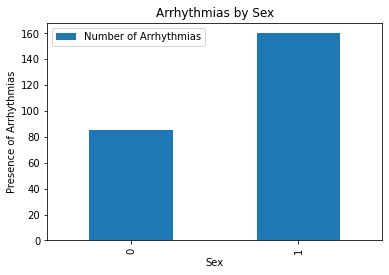

<Figure size 432x288 with 0 Axes>

In [16]:
# Chart our data, give it a title, and label the axes
sex_chart = sex_summary_df.plot(kind="bar", title="Arrhythmias by Sex")
sex_chart.set_xlabel("Sex")
sex_chart.set_ylabel("Presence of Arrhythmias")

plt.show()
plt.tight_layout()

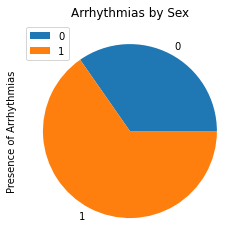

In [24]:
# Create a pie chart based upon the arrhythmia presence for each sex
sex_pie = sex_summary_df.plot(kind="pie", y='Number of Arrhythmias', title=("Arrhythmias by Sex"))
sex_pie.set_ylabel("Presence of Arrhythmias")

plt.show()